In [1]:
import os, sys
BASE_PATH = os.path.dirname(os.path.abspath(''))
print(BASE_PATH)
sys.path.append(BASE_PATH)

/root/sn6_clone


In [2]:
tr_cfg = {
    # dataset cfg
    'IMAGE_RS'      : 320,          # target resolution
    'TRAIN_PATH'    : '../../image_folder/sn6-crop',    # kaggle ds name
    'TRAIN_SPLITS'  : ['fold2'],               # folds used for training
    'VAL_PATH'      : '../../image_folder/sn6-crop',    # if None, don't validate
    'VAL_SPLITS'    : ['fold2'],    # folds used for validation
    'SAR_CH'        : [1],          # HH=1, HV=2, VH=3, VV=4. use None to read all channel
    'ORIENT'        : 1,
    
    # model cfg
    'BACKBONE'      : 'effb4',      # 'effb4', 'res50'
    'ARC'           : 'fpn',        # 'unet', 'fpn'
    'WEIGHT'        : None,         # 'imagenet', 'pre-trained from:..', None
    
    # training cfg
    'SEED'          : 17,
    'BATCH_SIZE'    : 8,
    'SHUFFLE_BUFFER': 150,
    'EPOCHS'        : 10,
    'LF'            : 'dice',       # 'bce', 'jaccard_distance', 'focal', 'giou'
    'L_RATE'        : 32e-4,        # 32e-4, 4e-4, 5e-5
    'IS_CV'         : 0,            # cross validation
    'IS_3_FOLD'     : 0,            # do same training 3x to get an average value
    'IS_CB_ES'      : 0,            # early stopping
    'IS_CB_LRS'     : 1,            # learning rate scheduler, if false uses lr_ramp
    
    # reduce method: 'resize', 'pad_resize', 'random_crop', 'random_crop_resize'
    'REDUCE_RES'    : 'random_crop_resize',
    'COMB_REDUCE'   : True, # when using rand_crop or rand_crop_resize, randomize reduce method with pad_resize
    'VAL_REDUCE_RES': 'pad_resize',

    # spatial transformations
    'IS_HFLIP'      : 1,
    'IS_VFLIP'      : 0,
    'IS_ROT90'      : 0,
    'IS_FINE_ROT'   : 1,
    'IS_SHEAR_X'    : 0,
    'IS_SHEAR_Y'    : 0,

    # aug magnitude
    'ROT_REFLECT'   : 0,
    'ROT_RANGE'     : [-10, 10],
    'SHEAR_RANGE'   : [-10, 10],

    # pixel transformations
    'IS_MOT_BLUR'   : 0,
    'IS_SHARPEN'    : 0,
    'IS_CLAHE'      : 0,
    'IS_GAUS_NOISE' : 0,
    'IS_SPECKLE_NOISE': 0,
    'IS_COARSE_DO'  : 0,

    # offline augs
    'OFF_DS'        : '',   # 'elee', 'frost', 'gmap' NOT ADOPTED YET
    'OFF_AUG_PATH'  : '',
}

In [3]:
from sn6.model import BFE

model = BFE(tr_cfg)
model.log_wandb('sn6_test', 'proto', 2)
model.load_model()
model.load_data()
model.train(verbose=1)

Segmentation Models: using `keras` framework.
Learning rate schedule: 0.0032 to 0.0032 to 3e-06


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: s_wangiyana (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.12 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


loading the fpn_effb4 model..
Total params: 20,915,833
starting training..
Epoch 1/10
42/42 [==============================] - ETA: 0s - loss: 0.6347 - iou_score: 0.2287 - f1-score: 0.3677

/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


42/42 [==============================] - 45s 613ms/step - loss: 0.6347 - iou_score: 0.2287 - f1-score: 0.3677 - val_loss: 0.7840 - val_iou_score: 0.1231 - val_f1-score: 0.2165 - lr: 0.0032
Epoch 2/10
42/42 [==============================] - 22s 533ms/step - loss: 0.5386 - iou_score: 0.3023 - f1-score: 0.4622 - val_loss: 0.9999 - val_iou_score: 1.5588e-10 - val_f1-score: 1.5588e-10 - lr: 0.0032
Epoch 3/10
42/42 [==============================] - 23s 541ms/step - loss: 0.5318 - iou_score: 0.3096 - f1-score: 0.4687 - val_loss: 0.9979 - val_iou_score: 1.2959e-10 - val_f1-score: 1.2959e-10 - lr: 0.0032
Epoch 4/10
42/42 [==============================] - 23s 546ms/step - loss: 0.5153 - iou_score: 0.3226 - f1-score: 0.4854 - val_loss: 1.0000 - val_iou_score: 1.4404e-10 - val_f1-score: 1.4404e-10 - lr: 0.0032
Epoch 5/10
42/42 [==============================] - 23s 546ms/step - loss: 0.5065 - iou_score: 0.3307 - f1-score: 0.4938 - val_loss: 0.9999 - val_iou_score: 1.2859e-10 - val_f1-score: 1.2

epoch,▁▂▃▃▄▅▆▆▇█
f1-score,▁▅▅▆▆▆▇▇██
iou_score,▁▅▅▆▆▆▇▇██
loss,█▄▄▃▃▃▂▂▁▁
lr,██████▁▁▁▁
val_f1-score,█▁▁▁▁▁▁▁▁▆
val_iou_score,█▁▁▁▁▁▁▁▁▅
val_loss,▁████████▃
best_epoch,0
best_val_iou_score,0.12306
epoch,9


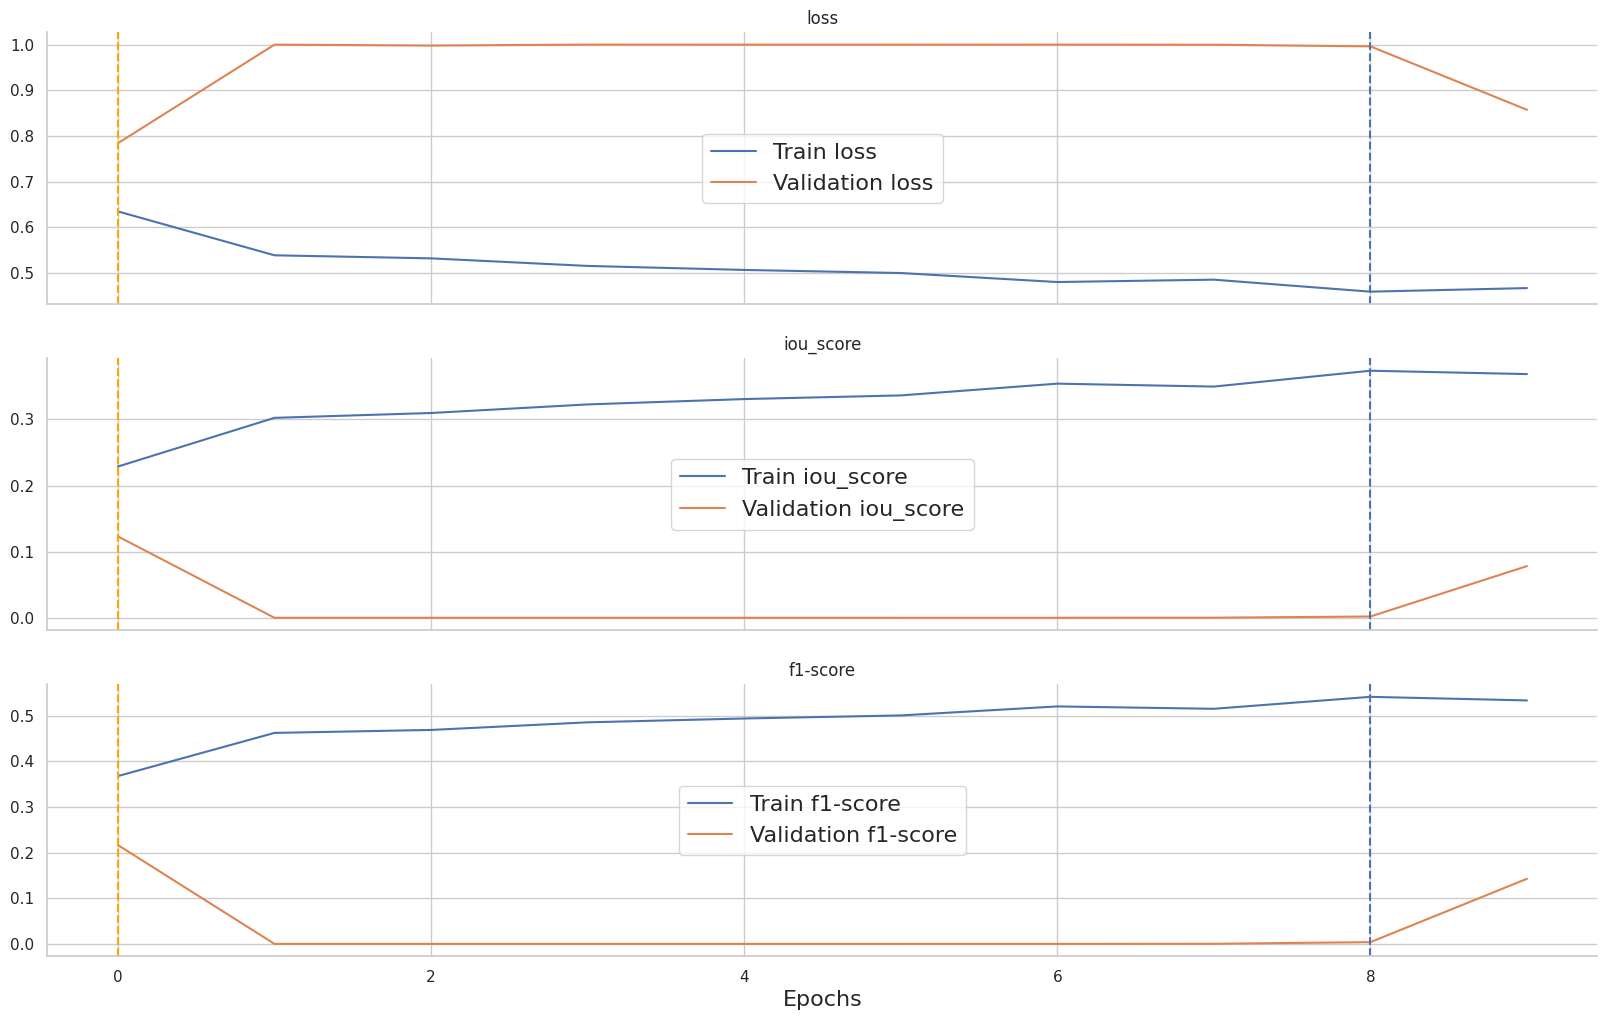

best model at epoch: 0
val loss: 0.7840, val iou: 0.1231, val f1: 0.2165
loss: 0.6347, iou: 0.2287, f1: 0.3677
best val IoU: 0.1230594739317894
SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823071743_20190823072036_tile_2619


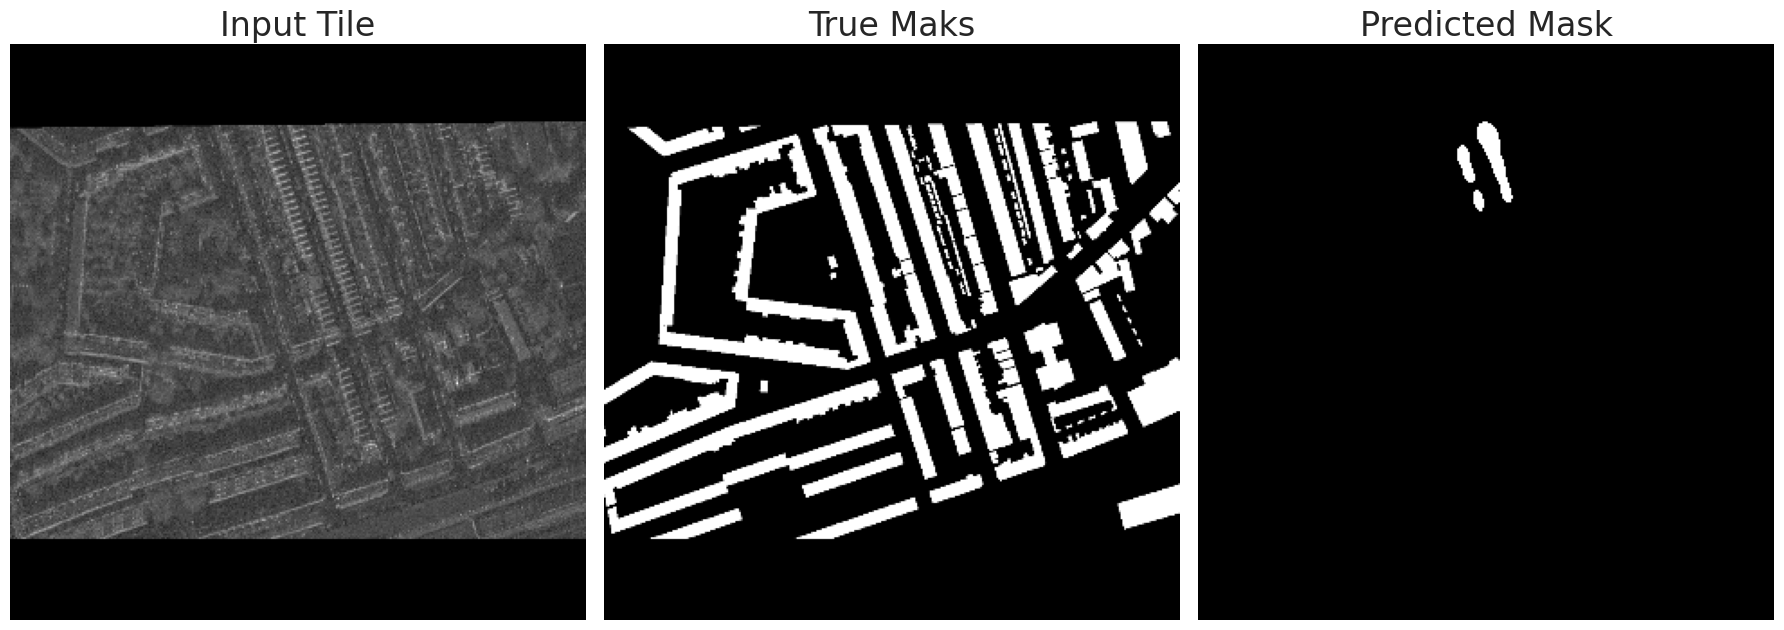

SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190823091635_20190823091951_tile_8782


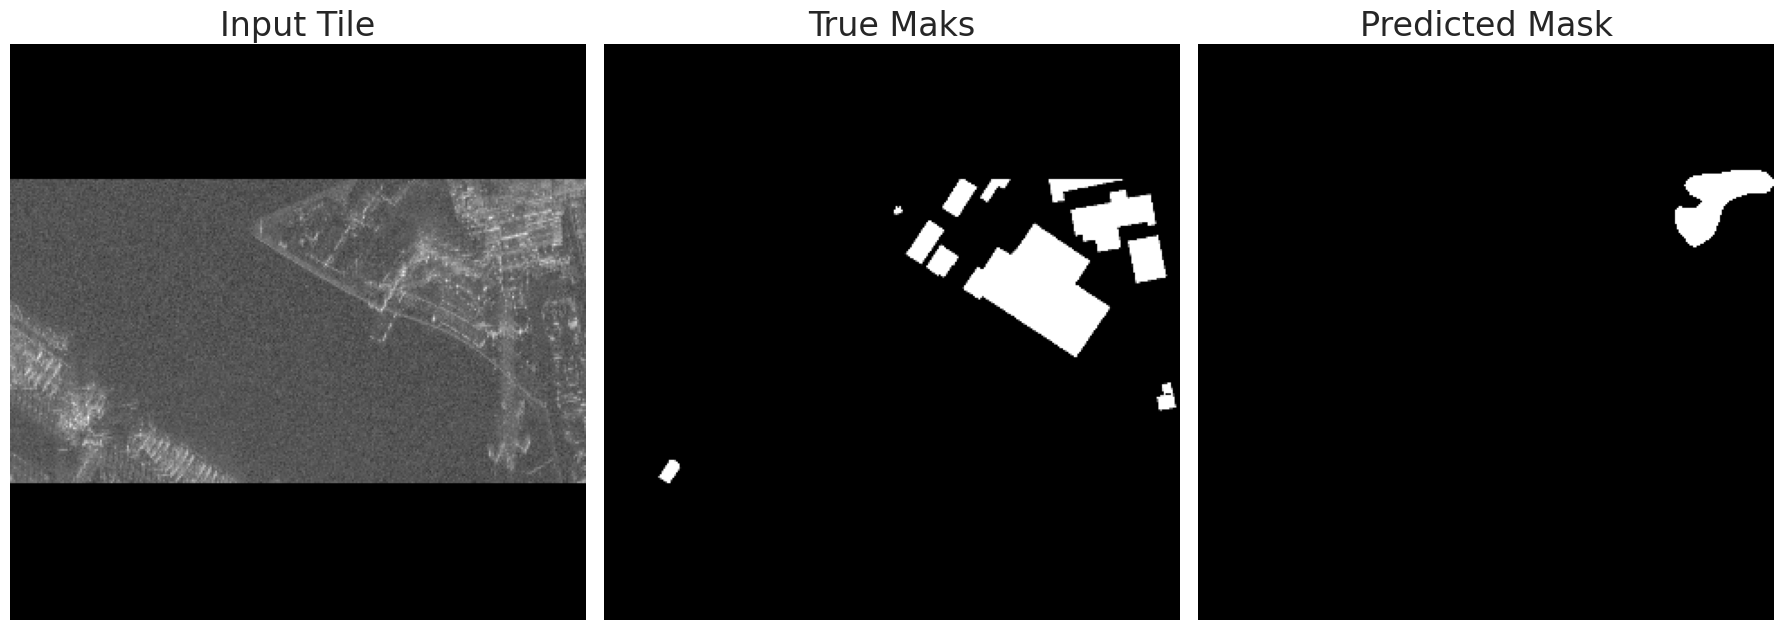

SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8679


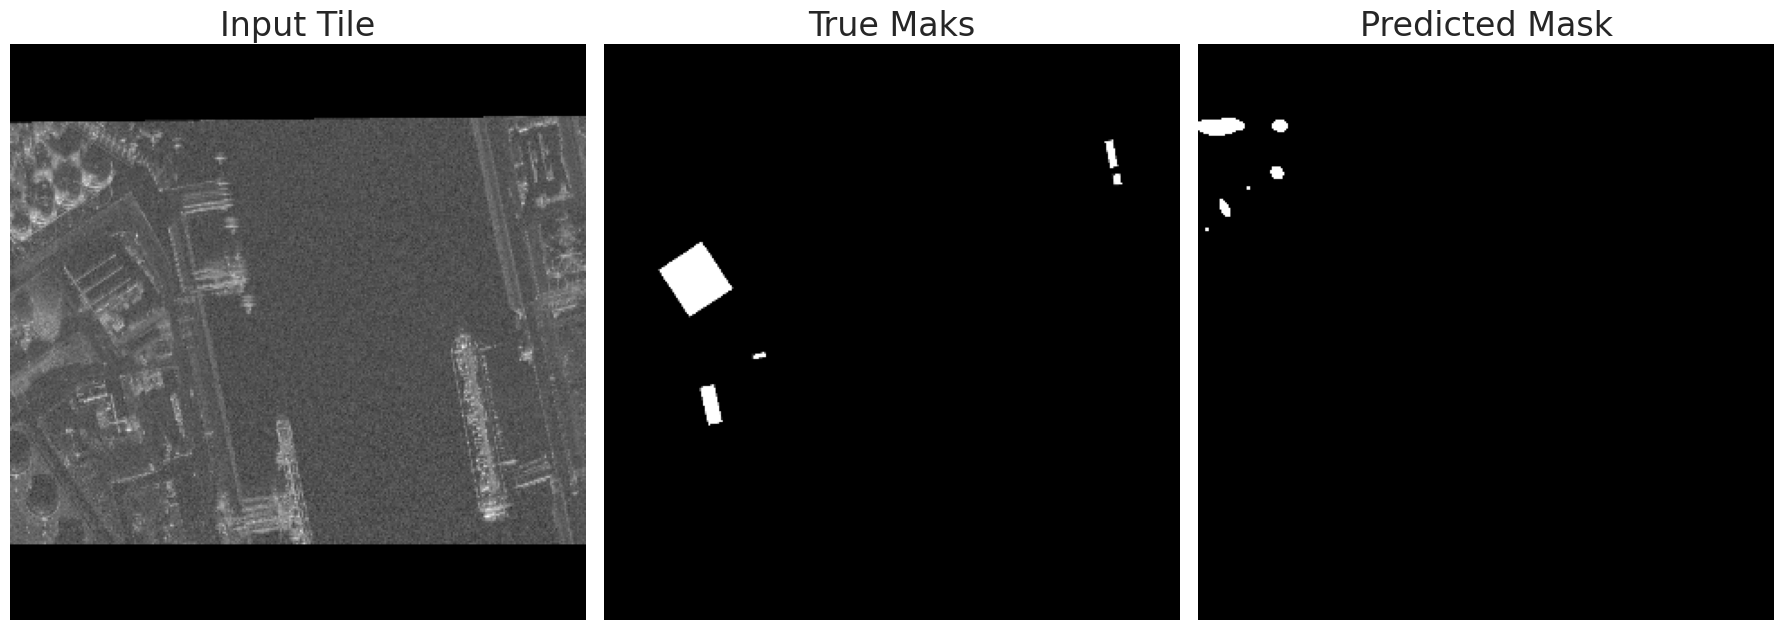

In [4]:
model.view_results()